In [5]:
import pydot, graphviz
import tensorflow as tf
from keras import regularizers
from keras.models import Sequential, load_model
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Dropout, concatenate
from keras.utils import np_utils
from keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.applications import ResNet50
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from sklearn.model_selection import train_test_split
import os
import pandas as pd
import xml.etree.ElementTree as ET
from sklearn.preprocessing import StandardScaler
from PIL import Image

In [6]:
mapping = {
    "1_chongkong" : 0,
    "2_hanfeng" : 1,
    "3_yueyawan": 2,
    "4_shuiban": 3,
    "5_youban": 4,
    "6_siban": 5,
    "7_yiwu": 6,
    "8_yahen": 11,
    "9_zhehen": 7,
    "10_yaozhed": 8,
    "scratches": 9,
    "rolled-in_scale": 10
}

In [7]:
X = []
y = []
X_train = []
y_train = []
X_val = []
y_val = []
w = int(2048/8)
l = int(1000/4)

In [8]:
def get_annotations(directory):
    try:
        tree = ET.parse(directory)
        root = tree.getroot()
        boxes = []
        for i in range(5):
            boxes.append(-1)

        defect = -1
        objs = root.findall('object')
        for i in objs:
            name = i.find('name').text
            defect = mapping.get(name, 12)
            if defect != 12 and defect != 11:
                box = i.find('bndbox')
                xmin = float(box.find('xmin').text)
                ymin = float(box.find('ymin').text)
                xmax = float(box.find('xmax').text)
                ymax = float(box.find('ymax').text)
                break
            else:
                defect = -1
        if defect == -1:
            return 0
        if xmin > xmax:
            temp = xmin
            xmin = xmax
            xmax = temp
        if ymin > ymax:
            temp = ymin
            ymin = ymax
            ymax = temp
            
        boxes[0] = defect
        boxes[1] = (xmin)/8.0
        boxes[2] = (ymin)/4.0
        boxes[3] = (xmax)/8.0
        boxes[4] = (ymax)/4.0
        
        return boxes
    except:
        return 0

In [9]:
print(w, l)

256 250


In [10]:
#Displaying sample data for all classes
path ='gc10det/crease'
for img in os.listdir(path):
    img_array1 = cv2.imread(os.path.join(path,img))
    img_array1 = cv2.resize(img_array1, (100, 100))
    break

path ='gc10det/crescent_gap'
for img in os.listdir(path):
    img_array2 = cv2.imread(os.path.join(path,img))
    img_array2 = cv2.resize(img_array2, (100, 100))
    break
    
    
path ='gc10det/inclusion'
for img in os.listdir(path):
    img_array3 = cv2.imread(os.path.join(path,img))
    img_array3 = cv2.resize(img_array3, (100, 100))
    break
    
    
path ='gc10det/oil_spot'
for img in os.listdir(path):
    img_array4 = cv2.imread(os.path.join(path,img))
    img_array4 = cv2.resize(img_array4, (100, 100))
    break
    
path ='gc10det/punching_hole'
for img in os.listdir(path):
    img_array5 = cv2.imread(os.path.join(path,img))
    img_array5 = cv2.resize(img_array5, (100, 100))
    break
    
path ='gc10det/rolled_in_scale'
for img in os.listdir(path):
    img_array6 = cv2.imread(os.path.join(path,img))
    img_array6 = cv2.resize(img_array6, (100, 100))
    break

path ='gc10det/scratches'
for img in os.listdir(path):
    img_array7 = cv2.imread(os.path.join(path,img))
    img_array7 = cv2.resize(img_array7, (100, 100))
    break
    
    
path ='gc10det/silk_spot'
for img in os.listdir(path):
    img_array8 = cv2.imread(os.path.join(path,img))
    img_array8 = cv2.resize(img_array8, (100, 100))
    break
    
    
path ='gc10det/waist_folding'
for img in os.listdir(path):
    img_array9 = cv2.imread(os.path.join(path,img))
    img_array9 = cv2.resize(img_array9, (100, 100))
    break
    
path ='gc10det/water_spot'
for img in os.listdir(path):
    img_array10 = cv2.imread(os.path.join(path,img))
    img_array10 = cv2.resize(img_array10, (100, 100))
    break
    
path ='gc10det/welding_line'
for img in os.listdir(path):
    img_array11 = cv2.imread(os.path.join(path,img))
    img_array11 = cv2.resize(img_array11, (100, 100))
    break
    
fig = plt.figure(figsize=(15, 15))
spec = gridspec.GridSpec(ncols=3, nrows=4,
                         width_ratios=[1, 1, 1], wspace=0.4,
                         hspace=0.4, height_ratios=[1, 1, 1, 1])
ax1 = fig.add_subplot(3, 4, 1)
ax1.imshow(img_array1, cmap='gray')
fig.suptitle("Sample images for 11 classes")
ax1.set_title("Crease")
ax2 = fig.add_subplot(3, 4, 2)
ax2.imshow(img_array2, cmap='gray')
ax2.set_title("Crescent Gap")
ax3 = fig.add_subplot(3, 4, 3)
ax3.imshow(img_array3, cmap='gray')
ax3.set_title("Inclusion")
ax4 = fig.add_subplot(3, 4, 4)
ax4.imshow(img_array4, cmap='gray')
ax4.set_title("Oil Spot")
ax5 = fig.add_subplot(3, 4, 5)
ax5.imshow(img_array5, cmap='gray')
ax5.set_title("Punching Hole")
ax6 = fig.add_subplot(3, 4, 6)
ax6.imshow(img_array6, cmap='gray')
ax6.set_title("Rolled in Scale")
ax7 = fig.add_subplot(3, 4, 7)
ax7.imshow(img_array7, cmap='gray')
ax7.set_title("Scratches")
ax8 = fig.add_subplot(3, 4, 8)
ax8.imshow(img_array8, cmap='gray')
ax8.set_title("Silk Spot")
ax9 = fig.add_subplot(3, 4, 9)
ax9.imshow(img_array9, cmap='gray')
ax9.set_title("Waist Folding")
ax10 = fig.add_subplot(3, 4, 10)
ax10.imshow(img_array10, cmap='gray')
ax10.set_title("Water Spot")
ax11 = fig.add_subplot(3, 4, 11)
ax11.imshow(img_array11, cmap='gray')
ax11.set_title("Welding Line")

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'gc10det/crease'

In [11]:
for i in range(1, 54):
    annotation = get_annotations(fr'lable/crease ({i}).xml')
    if(annotation):
        img = cv2.imread(fr'gc10det/crease/crease ({i}).jpg')
        img = cv2.resize(img, (w, l))
        X.append(img)
        y.append(annotation)

for i in range(1, 227):
    annotation = get_annotations(fr'lable/crescent_gap ({i}).xml')
    if(annotation):
        img = cv2.imread(fr'gc10det/crescent_gap/crescent_gap ({i}).jpg')
        img = cv2.resize(img, (w, l))
        X.append(img)
        y.append(annotation)
    
for i in range(1, 493):
    annotation = get_annotations(fr'lable/inclusion ({i}).xml')
    if(annotation):
        img = cv2.imread(fr'gc10det/inclusion/inclusion ({i}).jpg')
        img = cv2.resize(img, (w, l))
        X.append(img)
        y.append(annotation)

for i in range(1, 205):
    annotation = get_annotations(fr'lable/oil_spot ({i}).xml')
    if(annotation):
        img = cv2.imread(fr'gc10det/oil_spot/oil_spot ({i}).jpg')
        img = cv2.resize(img, (w, l))
        X.append(img)
        y.append(annotation)

for i in range(1, 220):
    annotation = get_annotations(fr'lable/punching_hole ({i}).xml')
    if(annotation):
        img = cv2.imread(fr'gc10det/punching_hole/punching_hole ({i}).jpg')
        img = cv2.resize(img, (w, l))
        X.append(img)
        y.append(annotation)

for i in range(1, 277):
    annotation = get_annotations(fr'lable/rolled_in_scale ({i}).xml')
    if(annotation):
        img = cv2.imread(fr'gc10det/rolled_in_scale/rolled_in_scale ({i}).jpg')
        img = cv2.resize(img, (w, l))
        X.append(img)
        y.append(annotation)
    
for i in range(1, 277):
    annotation = get_annotations(fr'lable/scratches ({i}).xml')
    if(annotation):
        img = cv2.imread(fr'gc10det/scratches/scratches ({i}).jpg')
        img = cv2.resize(img, (w, l))
        X.append(img)
        y.append(annotation)
    
for i in range(1, 652):
    annotation = get_annotations(fr'lable/silk_spot ({i}).xml')
    if(annotation):
        img = cv2.imread(fr'gc10det/silk_spot/silk_spot ({i}).jpg')
        img = cv2.resize(img, (w, l))
        X.append(img)
        y.append(annotation)

for i in range(1, 150):
    annotation = get_annotations(fr'lable/waist_folding ({i}).xml')
    if(annotation):
        img = cv2.imread(fr'gc10det/waist_folding/waist_folding ({i}).jpg')
        img = cv2.resize(img, (w, l))
        X.append(img)
        y.append(annotation)
    
for i in range(1, 290):
    annotation = get_annotations(fr'lable/water_spot ({i}).xml')
    if(annotation):
        img = cv2.imread(fr'gc10det/water_spot/water_spot ({i}).jpg')
        img = cv2.resize(img, (w, l))
        X.append(img)
        y.append(annotation)

for i in range(1, 274):
    annotation = get_annotations(fr'lable/welding_line ({i}).xml')
    if(annotation):
        img = cv2.imread(fr'gc10det/welding_line/welding_line ({i}).jpg')
        img = cv2.resize(img, (w, l))
        X.append(img)
        y.append(annotation)

In [12]:
test = set()
for i in range(len(y)):
    test.add(y[i][0])
print(test)

set()


In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [2]:
classes_train = []
dims_train = []
for i in range(len(y_train)):
    classes_train.append(y_train[i][0])
    dims_train.append(y_train[i][1:])

classes_val = []
dims_val = []
for i in range(len(y_val)):
    classes_val.append(y_val[i][0])
    dims_val.append(y_val[i][1:])

NameError: name 'y_train' is not defined

In [3]:
y

NameError: name 'y' is not defined

In [4]:
X_train = np.array(X_train, dtype = 'float')
#X_test = np.array(X_test, dtype = 'float')
X_val = np.array(X_val, dtype = 'float')

X_train /= 255.0
#X_test /= 255
X_val/= 255.0

NameError: name 'np' is not defined

In [11]:
num_classes = 11

classes_train = np.array(classes_train, dtype = 'float').astype('float64').reshape((-1,1))
dims_train = np.array(dims_train, dtype = 'float')
classes_val = np.array(classes_val, dtype = 'float').astype('float64').reshape((-1,1))
dims_val = np.array(dims_val, dtype = 'float')

classes_train = np_utils.to_categorical(classes_train, num_classes=num_classes)
classes_val = np_utils.to_categorical(classes_val, num_classes=num_classes)

scaler = StandardScaler()
dims_train = scaler.fit_transform(dims_train)
dims_val = scaler.transform(dims_val)

num_regressors = dims_train.shape[1]
print(num_regressors)

4


In [12]:
input_shape = (l, w, 3)

inputs = Input(shape=input_shape)

conv1 = Conv2D(64, kernel_size=(3, 3), activation='relu')(inputs)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = Conv2D(128, kernel_size=(3, 3), activation='relu')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
flatten = Flatten()(pool2)

dense_class1 = Dense(128, activation='relu')(flatten)
dense_class2 = Dense(64, activation='relu')(dense_class1)
output_class = Dense(11, activation='softmax', name='class_output')(dense_class2)

dense_reg1 = Dense(128, activation='relu')(flatten)
dense_reg2 = Dense(64, activation='relu')(dense_reg1)
output_reg = Dense(4, name='reg_output')(dense_reg2)

combined_output = concatenate([output_class, output_reg])

model = Model(inputs=inputs, outputs=[output_class, output_reg])

model.compile(optimizer='adam',
              loss={'class_output': 'categorical_crossentropy',
                    'reg_output': 'mse'},
              loss_weights={'class_output': 1.0, 'reg_output': 1.0},
              metrics={'class_output': 'accuracy',
                       'reg_output': 'mae'})

In [ ]:
mode.summary()

In [ ]:
plot_model(model, to_file='model_diagram.png', show_shapes=True)

In [13]:
H = model.fit(X_train, {'class_output': classes_train, 'reg_output': dims_train},
                    validation_data=(X_val, {'class_output': classes_val, 'reg_output': dims_val}),
                    batch_size=32, epochs=30)
model.save("annotations_best.h5")

Epoch 1/30
67/67 [==============================] - 128s 2s/step - loss: 6.7644 - class_output_loss: 2.6184 - reg_output_loss: 4.1460 - class_output_accuracy: 0.2612 - reg_output_mae: 1.0538 - val_loss: 2.6799 - val_class_output_loss: 1.8142 - val_reg_output_loss: 0.8657 - val_class_output_accuracy: 0.3284 - val_reg_output_mae: 0.7710
Epoch 2/30
67/67 [==============================] - 108s 2s/step - loss: 2.5541 - class_output_loss: 1.7470 - reg_output_loss: 0.8070 - class_output_accuracy: 0.3951 - reg_output_mae: 0.7338 - val_loss: 2.4375 - val_class_output_loss: 1.6328 - val_reg_output_loss: 0.8047 - val_class_output_accuracy: 0.4646 - val_reg_output_mae: 0.7299
Epoch 3/30
67/67 [==============================] - 107s 2s/step - loss: 2.2518 - class_output_loss: 1.5233 - reg_output_loss: 0.7285 - class_output_accuracy: 0.4725 - reg_output_mae: 0.6915 - val_loss: 2.1852 - val_class_output_loss: 1.4495 - val_reg_output_loss: 0.7357 - val_class_output_accuracy: 0.5728 - val_reg_output_m

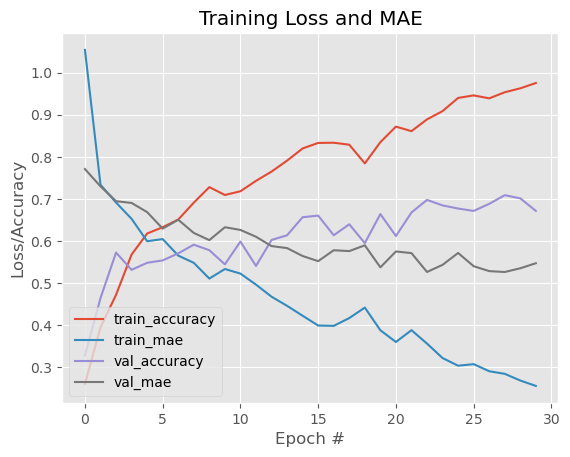

In [14]:
N = 30
plt.style.use("ggplot")
plt.figure()
#plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
#plt.plot(np.arange(0, N), H.history["class_output_loss"], label="train_class_loss")
#plt.plot(np.arange(0, N), H.history["reg_output_loss"], label="train_reg_loss")
plt.plot(np.arange(0, N), H.history["class_output_accuracy"], label="train_accuracy")
plt.plot(np.arange(0, N), H.history["reg_output_mae"], label="train_mae")
#plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
#plt.plot(np.arange(0, N), H.history["val_class_output_loss"], label="val_class_loss")
#plt.plot(np.arange(0, N), H.history["val_reg_output_loss"], label="val_reg_loss")
plt.plot(np.arange(0, N), H.history["val_class_output_accuracy"], label="val_accuracy")
plt.plot(np.arange(0, N), H.history["val_reg_output_mae"], label="val_mae")
plt.title("Training Loss and MAE")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.show()

In [ ]:
#model = load_model("annotations_best.h5")
img_test = cv2.imread(r'gc10det/water_spot/water_spot (50).jpg')
img_test = cv2.resize(img_test, (w, l))
img_test = [img_test]
img_test = np.array(img_test, dtype = 'float')
img_test /= 255
print(model.predict(img_test))
print(get_annotations("lable/water_spot (50).xml"))

In [15]:
def img_format(img):
    imgf = cv2.imread(img)
    imgf = cv2.resize(imgf, (w, l))
    imgf = [imgf]
    imgf = np.array(imgf, dtype = 'float')
    imgf /= 255
    return imgf

In [ ]:
a = get_annotations(r'gc10det/water_spot/water_spot (50).jpg')
print(a)

In [28]:
def plot(img_path, real, pred):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (w, l))
    img = np.array(img)

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(img, cmap = 'gray')
    
    name = np.argmax(pred[0][0])
    dims = scaler.inverse_transform(pred[1])
    xmin = dims[0][0]
    ymin = dims[0][1]
    xmax = dims[0][2]
    ymax = dims[0][3]
    
    if xmin > xmax:
        temp = xmin
        xmin = xmax
        xmax = temp
    if ymin > ymax:
        temp = ymin
        ymin = ymax
        ymax = temp
    print(xmin, ymin, xmax, ymax)

    width_rec = xmax - xmin
    height_rec = ymax - ymin

    rect = plt.Rectangle((xmin, ymin), width_rec, height_rec, fill=False, edgecolor='red')
    ax.add_patch(rect)
    plt.text(xmin+width_rec/2, ymin+height_rec/2, 'pred', color='red', ha='center', va='center')
    
    name = real[0]
    xmin = real[1]
    ymin = real[2]
    xmax = real[3]
    ymax = real[4]
    
    if xmin > xmax:
        temp = xmin
        xmin = xmax
        xmax = temp
    if ymin > ymax:
        temp = ymin
        ymin = ymax
        ymax = temp
            
    print(xmin, ymin, xmax, ymax)
    width_rec = xmax - xmin
    height_rec = ymax - ymin
    
    rect2 = plt.Rectangle((xmin, ymin), width_rec, height_rec, fill=False, edgecolor='blue')
    ax.add_patch(rect2)
    plt.text(xmin+width_rec/2, ymin+height_rec/2, 'real', color='blue', ha='center', va='center')

    plt.show()

1/1 [==============================] - 0s 44ms/step
[array([[4.3140271e-06, 9.6412390e-05, 4.1074265e-04, 2.7825881e-03,
        9.9082023e-01, 1.7901356e-03, 3.5786601e-03, 2.0103555e-04,
        2.4910166e-04, 6.4805230e-05, 1.9661766e-06]], dtype=float32), array([[0.93594986, 1.2933263 , 0.70606333, 1.0241293 ]], dtype=float32)]
155.13116 145.17264 199.84477 228.95116
207.125 183.25 243.375 248.25


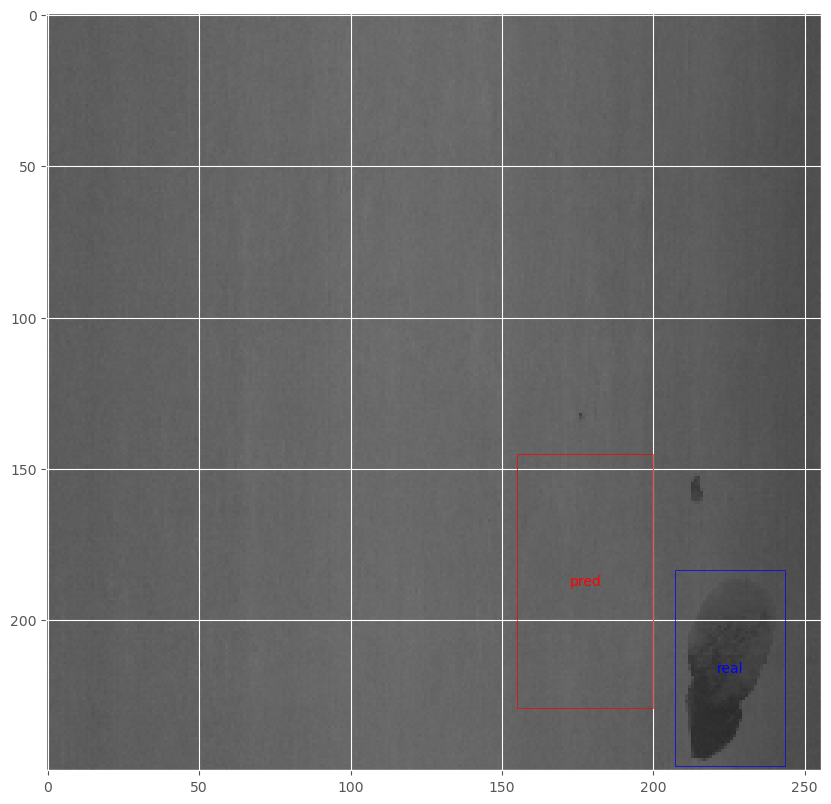

In [37]:
# img = r'gc10det/oil_spot/oil_spot (40).jpg'
# annot = "lable/oil_spot (40).xml"
# pred = model.predict(img_format(img))
# print(pred)
# plot(img, get_annotations(annot), pred)

In [ ]:
# for i in range(len(x_test)):
#     x_test = x_test[i]
#     real_val= y_test[i]
#     random_img= X[i]
#     random_img=[random_img]
#     random_img = np.array(random_img, dtype = 'float')
#     random_img/=255
#     prediction = model.predict(random_img)
#     yhat = np.argmax(prediction)
#     predictions.append(yhat)
#     if yhat!= real_val:
#         incorrect_predictions+=1
        
# print(incorrect_predictions)
# print(DataSet_length)
# tf.math.confusion_matrix(y, predictions)